In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

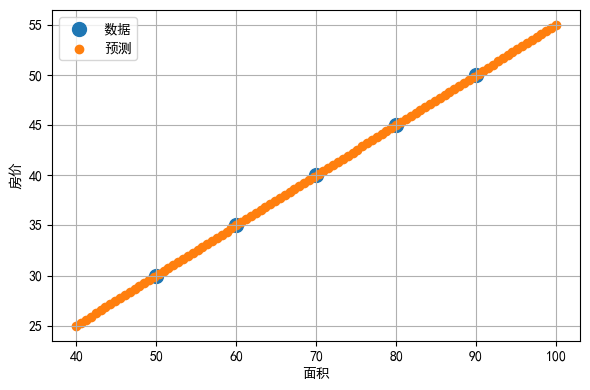

In [5]:
x = np.array([[50, 60, 70, 80, 90]]).reshape(-1, 1)
y = [30, 35, 40, 45,50]
plt.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(6, 4))
lr = LinearRegression()
lr.fit(x, y)
x_new = np.linspace(40, 100, 100)
y_pred = lr.predict(x_new.reshape(-1, 1))
plt.scatter(x, y, s=100, label='数据')
plt.scatter(x_new, y_pred, label='预测') 
plt.xlabel('面积') 
plt.ylabel('房价')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

## 绘制$x^2+y^2$等高线

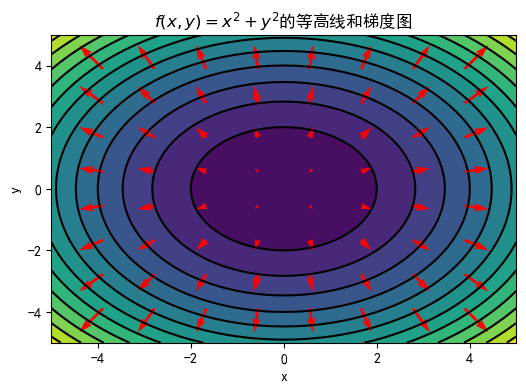

In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus'] = False
def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=15, colors='black')
plt.contourf(X, Y, Z, levels=15, cmap='viridis')

x_points = np.linspace(-5, 5, 10)
y_points = np.linspace(-5, 5, 10)
X_points, Y_points = np.meshgrid(x_points, y_points)

U, V = gradient_f(X_points, Y_points)

plt.quiver(X_points, Y_points, U, V, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x, y) = x^2 + y^2$的等高线和梯度图')
plt.show()

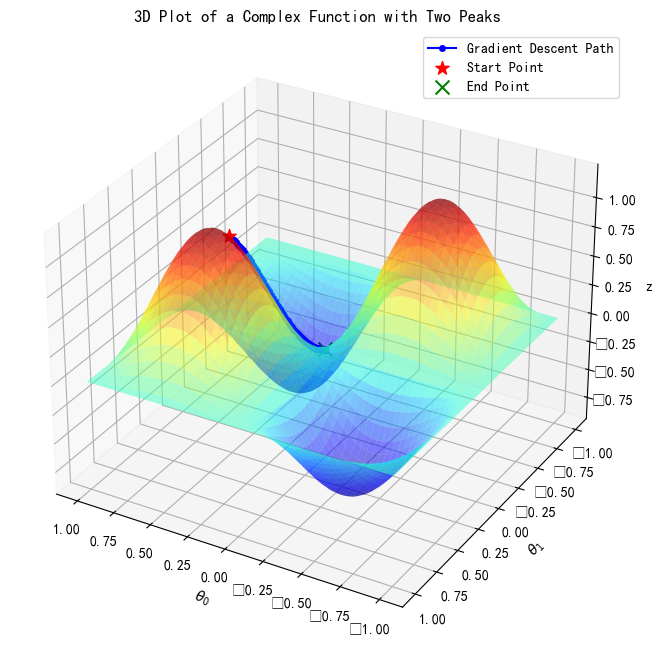

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义目标函数，具有两个山峰
def func(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) + \
           np.sin(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2))

# 定义梯度
def grad(x, y):
    df_dx = np.pi * np.cos(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) * (1 - 2*(x-0.5)) + \
             np.pi * np.cos(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2)) * (-1 - 2*(x+0.5))
    df_dy = np.pi * np.sin(np.pi * x) * np.cos(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) * (1 - 2*(y-0.5)) + \
             np.pi * np.sin(np.pi * x) * np.cos(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2)) * (-1 - 2*(y+0.5))
    return np.array([df_dx, df_dy])

# 创建网格数据
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 初始化梯度下降参数
x_start, y_start = 0.4, 0.4  # 初始点
learning_rate = 0.01  # 学习率
theta = 1e-6  # 停止条件，梯度的范数小于该值时停止
max_iter = 1000  # 最大迭代次数
x_history = [x_start]
y_history = [y_start]
z_history = [func(x_start, y_start)]

# 执行梯度下降
cnt = 0
while cnt < max_iter:
    cnt += 1
    grad_x, grad_y = grad(x_start, y_start)
    grad_num = np.sqrt(grad_x**2 + grad_y**2)
    x_start -= grad_x * learning_rate
    y_start -= grad_y * learning_rate
    x_history.append(x_start)
    y_history.append(y_start)
    z_history.append(func(x_start, y_start))
    if grad_num < theta:
        print(f"一共迭代了{cnt}次")
        break

# 绘制3D图表和梯度下降路径
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_history, y_history, z_history, 'b-', marker='o', markersize=4, label='Gradient Descent Path')  # 蓝色路径
ax.scatter(x_history[0], y_history[0], z_history[0], color='red', s=100, marker='*', label='Start Point')  # 特殊标记起始点

# 绘制结束点
ax.scatter(x_history[-1], y_history[-1], z_history[-1], color='green', s=100, marker='x', label='End Point')

ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
ax.view_init(elev=30, azim=120)  # 调整视角
ax.set_title("3D Plot of a Complex Function with Two Peaks")
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel("z")
ax.legend()
plt.show()

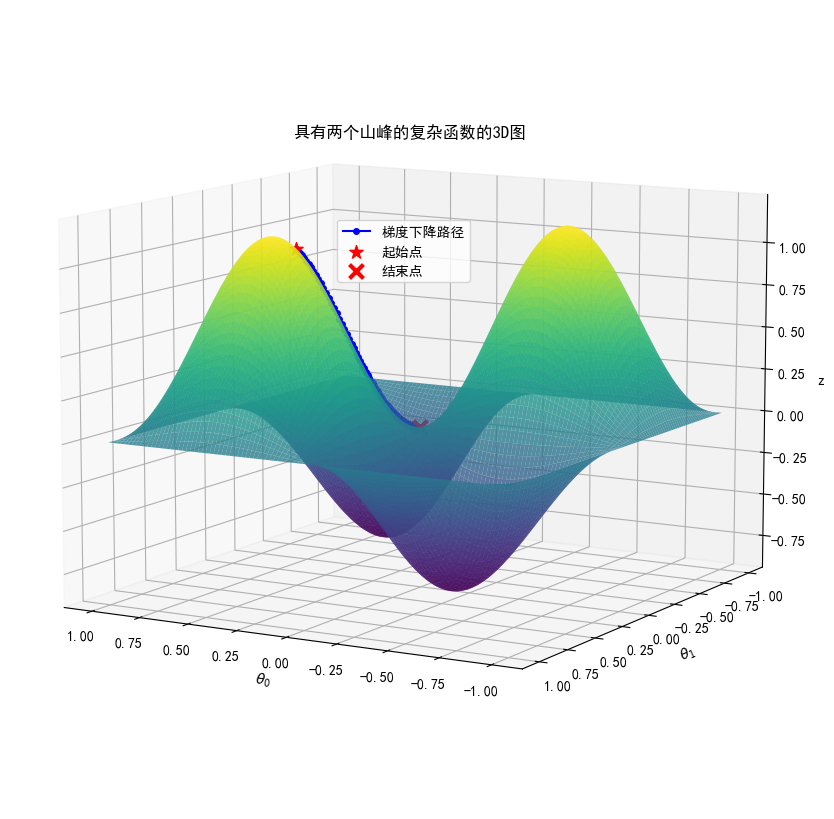

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置matplotlib支持中文和负号显示
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 定义目标函数，具有两个山峰
def func(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) + \
           np.sin(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2))

# 定义梯度
def grad(x, y):
    df_dx = np.pi * np.cos(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) * (1 - 2*(x-0.5)) + \
             np.pi * np.cos(np.pi * x) * np.sin(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2)) * (-1 - 2*(x+0.5))
    df_dy = np.pi * np.sin(np.pi * x) * np.cos(np.pi * y) * np.exp(-((x-0.5)**2 + (y-0.5)**2)) * (1 - 2*(y-0.5)) + \
             np.pi * np.sin(np.pi * x) * np.cos(np.pi * y) * np.exp(-((x+0.5)**2 + (y+0.5)**2)) * (-1 - 2*(y+0.5))
    return np.array([df_dx, df_dy])

# 创建网格数据
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 初始化梯度下降参数
x_start, y_start = 0.4, 0.4  # 初始点
learning_rate = 0.01  # 学习率
theta = 1e-6  # 停止条件，梯度的范数小于该值时停止
max_iter = 1000  # 最大迭代次数
x_history = [x_start]
y_history = [y_start]
z_history = [func(x_start, y_start)]

# 执行梯度下降
cnt = 0
while cnt < max_iter:
    cnt += 1
    grad_x, grad_y = grad(x_start, y_start)
    grad_num = np.sqrt(grad_x**2 + grad_y**2)
    x_start -= grad_x * learning_rate
    y_start -= grad_y * learning_rate
    x_history.append(x_start)
    y_history.append(y_start)
    z_history.append(func(x_start, y_start))
    if grad_num < theta:
        print(f"一共迭代了{cnt}次")
        break

# 绘制3D图表和梯度下降路径
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()
ax = fig.add_subplot(111, projection='3d')


# 绘制梯度下降路径
ax.plot(x_history, y_history, z_history, 'b-', marker='o', markersize=4, label='梯度下降路径')  # 蓝色路径
ax.scatter(x_history[0], y_history[0], z_history[0], color='red', s=100, marker='*', label='起始点')  # 特殊标记起始点
ax.scatter(x_history[-1], y_history[-1], z_history[-1], color='red', s=100, marker='x', label='结束点', linewidth=3)  # 特殊标记结束点

# 绘制表面，设置shade=True来启用颜色渐变
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, rstride=1, cstride=1, shade=False)

# 绘制网格线，使得背面可见
# ax.plot_wireframe(X, Y, Z, color='k', alpha=0.1)

# 调整视角
ax.view_init(elev=10, azim=120)

# 设置标题和坐标轴标签
ax.set_title("具有两个山峰的复杂函数的3D图", y=0.9)
ax.set_xlabel("$θ_0$")
ax.set_ylabel("$θ_1$")
ax.set_zlabel("z")

# 显示图例
ax.legend(bbox_to_anchor=(0.4, 0.65),loc='lower left')
# plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# 显示图表
plt.show()